## 노드 12 - 딥러닝 프로젝트

--------------------------------------------------------------------------------

### **<Boston 주택 가격 예측 모델>**

#### 1) 데이터 로드 및 전처리
- 먼저, 데이터를 불러와서 확인하고 전처리를 진행한다.
- 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용한다. 

In [2]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


- 이제, 데이터셋의 전처리를 위해 표준화 작업을 진행한다.

In [4]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

#### 2) 모델 구성 및 컴파일
- 그 다음, 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일한다.
- Sequential() 함수를 이용하여 Sequential API 방법으로 딥러닝 모델을 구성해본다. 

In [5]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # 출력층은 유닛 수 1, 활성화 함수 없음 (회귀)

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

c:\Users\lynn9\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 3) 모델 학습
- epochs -> 100
- batch_size -> 16 으로 임의로 설정했다.

In [6]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

history = model.fit(
    train_data,
    train_labels,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 570.0101 - mae: 21.9420 - val_loss: 553.5905 - val_mae: 21.7733
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 453.5004 - mae: 19.4098 - val_loss: 427.1080 - val_mae: 18.8224
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 341.0602 - mae: 16.2669 - val_loss: 279.2711 - val_mae: 14.7408
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 183.9090 - mae: 11.5210 - val_loss: 150.4289 - val_mae: 9.9230
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 104.7602 - mae: 8.3323 - val_loss: 77.5580 - val_mae: 6.7728
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 53.2422 - mae: 5.8137 - val_loss: 49.4399 - val_mae: 5.4579
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 42.3895 - mae: 4.8120 - val_loss: 37.0287 - val_mae: 4.6259
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29.5274 - mae: 3.7836 - val_loss: 27.7032 - val_mae: 4.0816
Epoch 9/100
21/21 ━━━━━━━━━━━━━

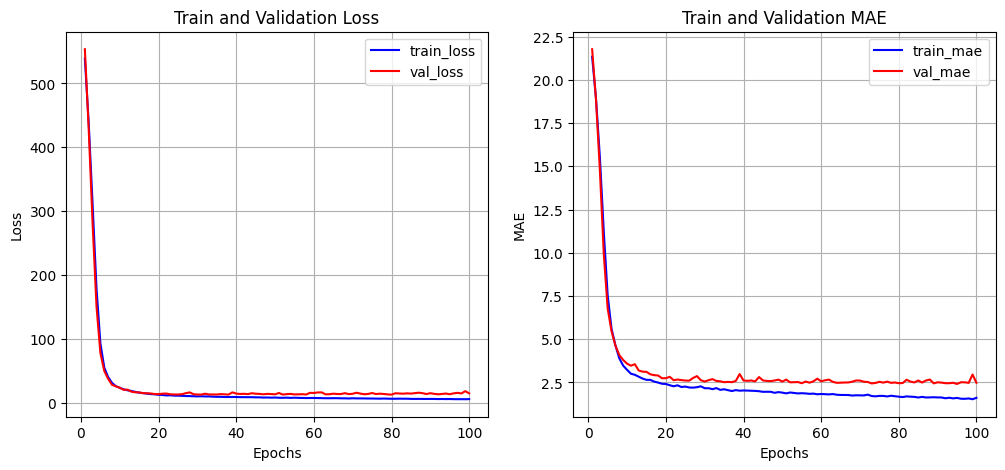

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
# plt.style.use('seaborn-whitegrid')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

#### 4) 모델 평가 및 예측
- test 데이터를 가져와서, 모델 성능을 평가한다.

In [8]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels, verbose=1)

print(f"Test MSE: {test_mse_score:.4f}")
print(f"Test MAE: {test_mae_score:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.7343 - mae: 2.7159 
Test MSE: 22.3154
Test MAE: 2.8757


<결과>
- MAE (평균절대오차): 약 2.6 ~ 2.8
- MAE 값이 약 2.8 이면, 예측 오차가 약 2800달러라는 의미라고 한다.
- 이 정도 오차는, 이 데이터셋에서 보통 or 그나마 양호하다고 판단할 수 있다.
- 그치만 성능 개선을 해보는것이 좋다.

--------------------------------------------------------------------------------

### **<Reuters 딥러닝 모델>**

#### 1) 데이터 로드 및 전처리
- reuters 데이터셋을 불러오고, train(학습) 데이터셋에서 25%를 validation(검증) 데이터셋으로 분리한다.
- 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터셋을 활용하고, 이때 파라미터 조정을 통해서 단어의 개수는 10000개로 제한한다 (num_words=10000).
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용한다.
- train/validation/test 데이터와 레이블 종류가 몇 개인지 출력해본다.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [10]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 훈련 데이터에서 검증 데이터를 25% 비율로 분리
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.25, random_state=42
)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))       # 훈련 데이터 수
print(len(val_data))         # 검증 데이터 수
print(len(test_data))        # 테스트 데이터 수
print(len(set(train_labels)))  # 레이블의 개수 (클래스 수)

6736
2246
2246
46


- 그 다음, 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 '원-핫 인코딩'을 수행한다.
- 레이블 데이터들은 범주형(categorical) 형태로, to_categorical() 함수를 사용하여 변환한다.

In [11]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.0  # 단어 인덱스 위치에 1 할당
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

#### 2) 모델 구성 및 컴파일
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성한다.

In [12]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())      # 배치 정규화
model.add(layers.Dropout(0.5))              # 드롭아웃으로 과적합 방지

model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(46, activation='softmax'))  # 46개 뉴스 카테고리 분류용 출력층

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\lynn9\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,292,142 (4.93 MB)

 Trainable params: 1,291,758 (4.93 MB)

 Non-trainable params: 384 (1.50 KB)

#### 3) 모델 학습
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여, 모델 학습을 진행한다.

In [14]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_cb = callbacks.ModelCheckpoint(
    'best_reuters_model.keras',  # 저장할 모델 파일 이름
    monitor='val_loss',       # 검증 손실 기준
    save_best_only=True,      # 가장 성능이 좋은 모델만 저장
    verbose=1
)

earlystop_cb = callbacks.EarlyStopping(
    monitor='val_loss',       # 검증 손실 기준
    patience=5,               # 5번 연속 향상되지 않으면 종료
    restore_best_weights=True  # 가장 좋은 모델 가중치 복원
)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.1658 - loss: 3.9408
Epoch 1: val_loss improved from inf to 3.50364, saving model to best_reuters_model.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 338ms/step - accuracy: 0.1728 - loss: 3.9078 - val_accuracy: 0.5187 - val_loss: 3.5036
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.5086 - loss: 2.3050
Epoch 2: val_loss improved from 3.50364 to 3.13956, saving model to best_reuters_model.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.5107 - loss: 2.2960 - val_accuracy: 0.6420 - val_loss: 3.1396
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.6398 - loss: 1.7214
Epoch 3: val_loss improved from 3.13956 to 2.81665, saving model to best_reuters_model.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - accuracy: 0.6413 - loss: 1.7162 - val_accuracy: 0.6999 - val_loss: 2.8167
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7141 - loss: 1.4147
Epoch 4: val_loss improved fr

- 다음으로, 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화한다.

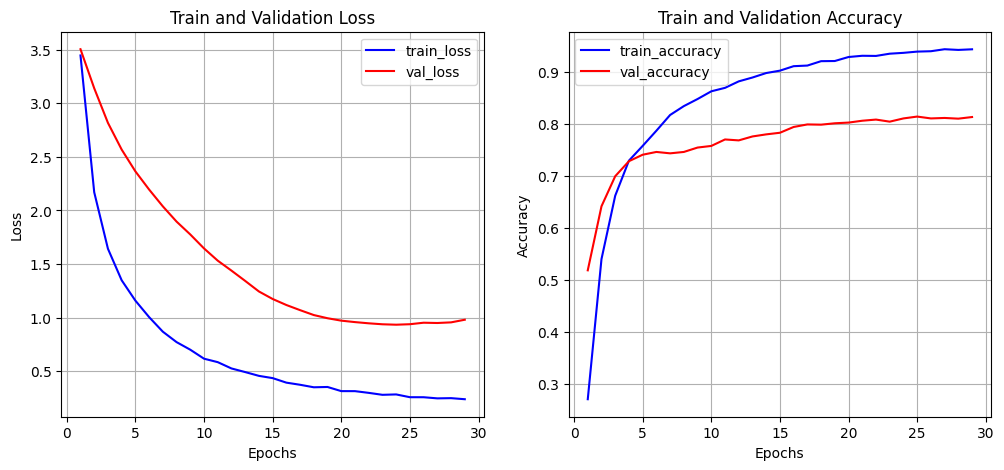

In [15]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

#### 5) 모델 평가 및 예측
- 마지막으로, 테스트 데이터셋을 이용하여 모델을 평가한다.

In [16]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7935 - loss: 0.9993
Test Loss: 1.0105
Test Accuracy: 0.7863


<결과>
- 정확도(Accuracy): 약 78.6%
- loss: 약 1.0 -> categorical_crossentropy 손실함수는 로그 확률 기반이므로, 값이 1.0 정도면 안정적인 편이라고 할 수 있다.
- 그치만 성능 개선을 해보는것이 좋다.

--------------------------------------------------------------------------------

### **<CIFAR10 딥러닝 모델>**

#### 1) 데이터 로드 및 전처리
- 우선, CIFAR10 데이터셋을 로드하고, train(학습) 데이터셋에서 20%를 validation(검증) 데이터셋으로 분리한다.
- 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터셋을 활용한다.
    - 🧐 CIFAR10 데이터셋: 32*32 픽셀의 6000개의 컬러 이미지로 이루어져 있다. 이 데이터셋의 각 이미지는 10개의 클래스로 라벨링되어 있으며, 머신러닝 연구에 가장 널리 사용되고 있다.
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용한다.
- train/validation/test 데이터와 레이블 종류가 몇 개인지 출력해본다.

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [18]:
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 픽셀 값 정규화 (0~255 → 0~1 범위)
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 훈련 데이터 중 20%를 검증용으로 분리
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


- 이제, class_name 변수를 만들어서 cifar10의 분류에 해당하는  'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'을 담는다.

In [19]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

- 그 다음, 데이터 중 샘플 하나를 시각화 해보고, 데이터의 형태를 확인해본다. 

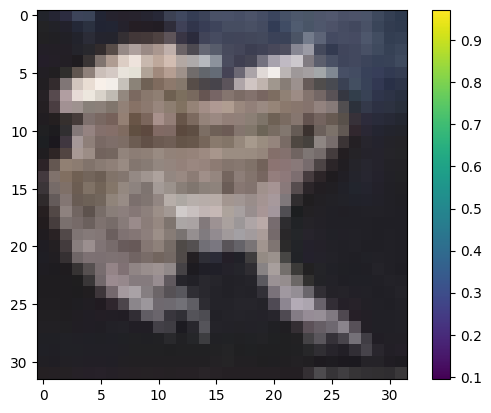

In [20]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [21]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


- 그 다음, 데이터의 형태를 변형해서 모델이 잘 학습할 수 있게끔 만든다.

In [22]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_val = x_val.reshape((x_val.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [23]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

#### 2) 모델 구성 및 컴파일
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성한다.

In [24]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(3072,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))  # CIFAR-10은 클래스가 10개

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # 레이블이 정수 형태일 경우 사용
    metrics=['accuracy']
)

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,710,346 (6.52 MB)

 Trainable params: 1,708,810 (6.52 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [26]:
utils.plot_model(model, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


#### 3) 모델 학습
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행한다.

In [27]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

checkpoint_cb = callbacks.ModelCheckpoint(
    'best_cifar10_model.keras',   # .keras 확장자 필수
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

earlystop_cb = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.2405 - loss: 2.4432
Epoch 1: val_loss improved from inf to 2.26750, saving model to best_cifar10_model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.2407 - loss: 2.4425 - val_accuracy: 0.1196 - val_loss: 2.2675
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.3341 - loss: 1.8835
Epoch 2: val_loss improved from 2.26750 to 1.81092, saving model to best_cifar10_model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.3342 - loss: 1.8834 - val_accuracy: 0.3930 - val_loss: 1.8109
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3702 - loss: 1.7585
Epoch 3: val_loss improved from 1.81092 to 1.67870, saving model to best_cifar10_model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.3702 - loss: 1.7585 - val_accuracy: 0.3959 - val_loss: 1.6787
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3899 - loss: 1.7094
Epoch 4: val_loss i

- 그 다음, 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화한다.

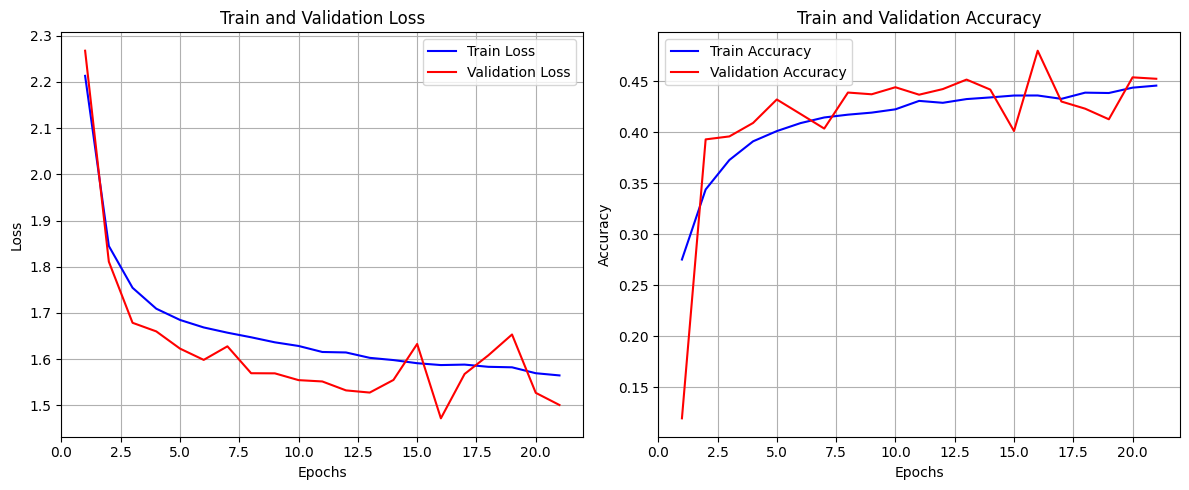

In [28]:
# 문제 3-5: 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

# 손실(Loss) 시각화
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='Train Loss')
ax1.plot(epochs, val_loss, 'r-', label='Validation Loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

# 정확도(Accuracy) 시각화
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='Train Accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()

#### 4) 모델 평가 및 예측
- 마지막으로, 테스트 데이터셋을 이용하여 모델을 평가한다.

In [29]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4868 - loss: 1.4579
Test Loss: 1.4620
Test Accuracy: 0.4847


<결과>
- 정확도(Accuracy): 약 48.5%
- 전반적으로 많이 낮은 정확도이므로, 모델 개선뿐만 아니라 다른 모델을 활용하는 방법까지도 고려해 볼 수 있다.
- cf) 사실 지금까지 배운 Dense layer만 활용해서는 이번 프로젝트에서 높은 정확도를 얻기는 힘들다고 한다. 이미지 데이터를 다루기 위해서는 이미지에 적합한 CNN(Convolution Neural Network) 계열의 모델을 사용해야 한다..!